<a href="https://colab.research.google.com/github/Azrilhidayatullah24/azr_car-sales-missing-data/blob/main/Portofolio_Azr_(DSF_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Membaca Dataset

In [12]:
import pandas as pd

data = pd.read_csv('/content/sample_data/car-sales-extended-missing-data.csv')

In [13]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


# 2. Mengecek Data yang Hilang (Missing Value)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [15]:
data.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


**Observasi:**

Dari informasi yang kita dapatkan pada data terdapat beberapa data yang hilang pada kolom `Make`, `Colour`, `Odometer (KM)`, `Doors` dan `price`

In [25]:
data.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


**Observasi:**
* Secara keseluruhan, nilai minimum dan maksimum masuk akal untuk setiap kolom
* _Mean ~ 50% (Median)_ di kolom `Odometer (KM)`, `Doors`, dan `Price`, menunjukkan distribusi normal


In [29]:
# Mengatasi missing value
for column in data.columns:
    if data[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        data[column].fillna(data[column].mean(), inplace=True)

<ipython-input-29-324ae1348a0d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [30]:
data.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           1000 non-null   object 
 1   Colour         1000 non-null   object 
 2   Odometer (KM)  1000 non-null   float64
 3   Doors          1000 non-null   float64
 4   Price          1000 non-null   float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


# 3. Mengatasi Duplikat Data

In [33]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = data.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 1


In [35]:
# Handling duplicate
data = data.drop_duplicates()

In [36]:
# Mengecek duplicate setelah di-handle
handle_duplicate = data.duplicated().sum()

print(f"Jumlah data yang duplikat = {handle_duplicate}")

Jumlah data yang duplikat = 0


```
Yeayyy!!! Kita berhasil mengatasi duplikat data 😀
```

# **4. Menyimpan Dataset yang Sudah Bersih & Siap Digunakan**

In [38]:
# Menyimpan data yang sudah bersih dari Missing Value dan Duplicate
data.to_csv('car-sales-extended-celar-data.csv', index=False)

Data siap digunakan dan bisa didownload 😀
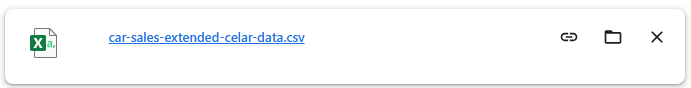